In [6]:
import pandas as pd
import numpy as np


df = pd.read_csv('../data/marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [12]:
# Preprocessing: Convert 'converted' to binary
df['converted'] = df['converted'].astype(int)

# Remove unnecessary columns
data_cleaned = df.drop(columns=['Unnamed: 0'])

# Display the first few rows
data_cleaned.head(5)


,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,0,130,Monday,20
1,1119715,ad,0,93,Tuesday,22
2,1144181,ad,0,21,Tuesday,18
3,1435133,ad,0,355,Tuesday,10
4,1015700,ad,0,276,Friday,14


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [13]:
# Group by test group and calculate conversion rate
conversion_rates = data_cleaned.groupby('test group')['converted'].mean()
group_counts = data_cleaned.groupby('test group')['converted'].agg(['count', 'sum'])

print("Conversion Rates:", conversion_rates)
print("Group Counts:", group_counts)

Conversion Rates: test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64
Group Counts:              count    sum
test group               
ad          564577  14423
psa          23524    420


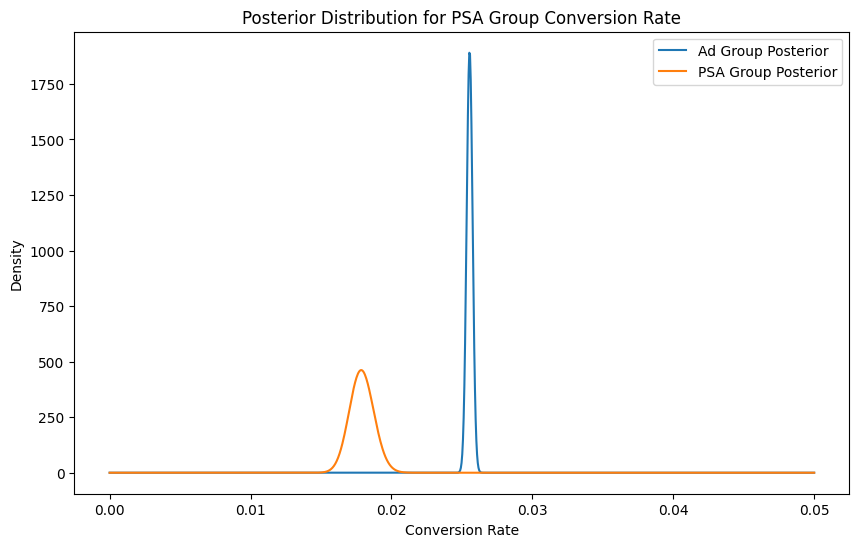

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define a function to compute the posterior distribution
def plot_posterior(conversions, total, group_name):
    # Beta prior (assuming a non-informative prior with alpha=1, beta=1)
    alpha_prior = 1
    beta_prior = 1
    
    # Posterior distribution (conversions + prior)
    alpha_posterior = alpha_prior + conversions
    beta_posterior = beta_prior + (total - conversions)
    
    # Sample from the posterior distribution
    x = np.linspace(0, 0.05, 1000)
    posterior_pdf = beta.pdf(x, alpha_posterior, beta_posterior)
    
    # Plot the posterior distribution
    plt.plot(x, posterior_pdf, label=f'{group_name} Posterior')
    plt.title(f'Posterior Distribution for {group_name} Conversion Rate')
    plt.xlabel('Conversion Rate')
    plt.ylabel('Density')
    plt.legend()

# Plot posteriors for both groups
plt.figure(figsize=(10, 6))
plot_posterior(14423, 564577, 'Ad Group')
plot_posterior(420, 23524, 'PSA Group')
plt.show()


In [16]:
# Monte Carlo simulation to estimate the probability that one group has a higher conversion rate
ad_samples = beta.rvs(14423 + 1, 564577 - 14423 + 1, size=10000)
psa_samples = beta.rvs(420 + 1, 23524 - 420 + 1, size=10000)

# Estimate the probability that the ad group is better than the PSA group
prob_ad_better = np.mean(ad_samples > psa_samples)
print(f'Probability that Ad Group conversion rate is higher than PSA Group: {prob_ad_better:.2%}')

Probability that Ad Group conversion rate is higher than PSA Group: 100.00%
